<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/master/BrownianMotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

In [ ]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

#frames = gray(pims.open('C:\\Users\\veillette\\Documents\\testImage.png'))
frames = gray(pims.open('C:\\Users\\veillette\\Downloads\\BrownianMotio.MOV'))

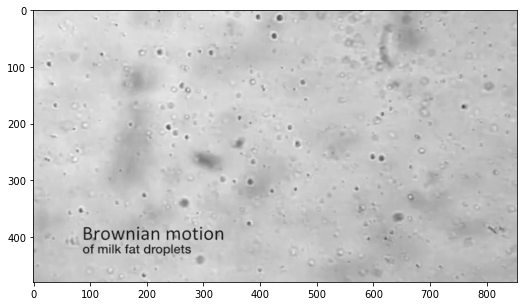

In [ ]:
plt.imshow(frames[0]);

In [ ]:
f = tp.batch(frames[:1200], 11, invert=True, minmass=1000)

Frame 1199: 36 features


In [ ]:
f.head() 

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,11.563454,396.352080,1748.167054,2.668648,0.107378,59.210341,10469.0,0.057481,0
1,13.697880,434.033248,2275.577688,3.218562,0.086403,45.686992,13133.0,0.031920,0
2,45.266500,424.968962,2048.970208,2.906008,0.121950,50.803935,12069.0,0.038813,0
3,74.001919,222.819868,1714.541428,2.975850,0.058979,42.032032,10402.0,0.058662,0
4,74.842187,313.609743,1410.448811,2.648688,0.137537,44.225008,10208.0,0.062375,0


C:\Users\veillette\anaconda3\lib\site-packages\pims\pyav_reader.py:232: MethodDeprecationWarning: VideoStream.seek is deprecated.
  self._stream.seek(timestamp + self._first_pts)


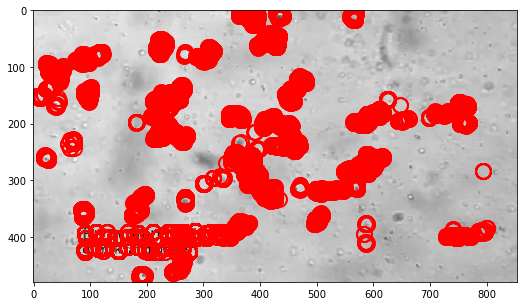

In [ ]:
tp.annotate(f, frames[0]);

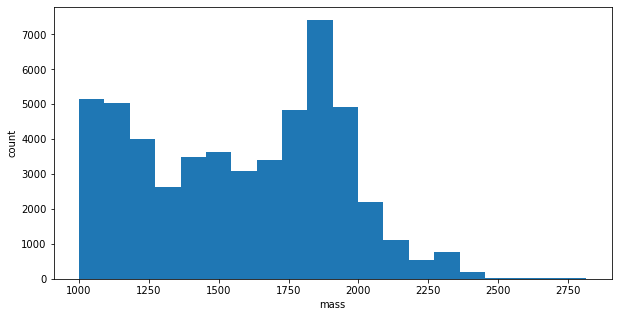

In [ ]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [ ]:
t = tp.link(f, 5, memory=3)

Frame 1199: 36 trajectories present.


In [ ]:
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,11.563454,396.352080,1748.167054,2.668648,0.107378,59.210341,10469.0,0.057481,0,0
28,392.008096,111.015517,2167.025395,2.869865,0.287560,90.277496,11813.0,0.040941,0,1
29,392.353215,210.997018,1960.885688,2.726317,0.269756,89.912000,11556.0,0.043324,0,2
30,392.426664,237.534636,1888.882989,2.686683,0.252266,88.815512,11270.0,0.046326,0,3
31,392.317436,323.953453,1915.929688,2.727689,0.246356,83.698569,12330.0,0.036860,0,4


In [ ]:
t1 = tp.filter_stubs(t, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 751
After: 227


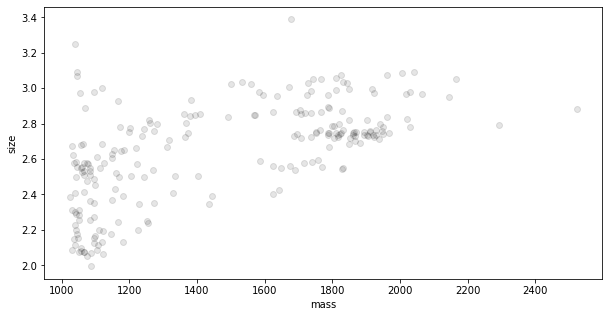

In [ ]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [ ]:
t2 = t1[((t1['mass'] > 50) & (t1['size'] < 2.6) &
         (t1['ecc'] < 0.3))]

C:\Users\veillette\anaconda3\lib\site-packages\pims\pyav_reader.py:232: MethodDeprecationWarning: VideoStream.seek is deprecated.
  self._stream.seek(timestamp + self._first_pts)


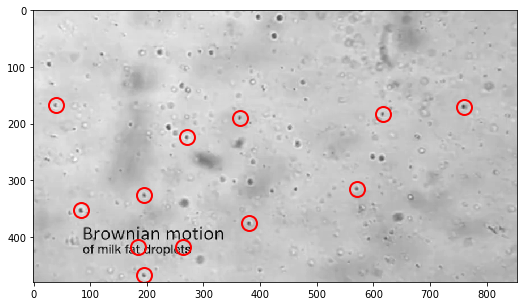

In [ ]:
plt.figure()
tp.annotate(t2[t2['frame'] == 0], frames[0]);

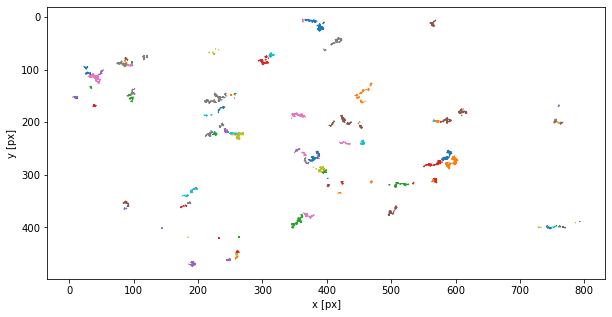

In [ ]:
plt.figure()
tp.plot_traj(t2);

In [ ]:
d = tp.compute_drift(t2)

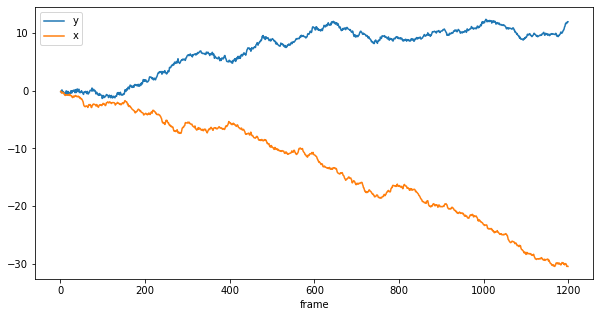

In [ ]:
d.plot()
plt.show()

In [ ]:
tm = tp.subtract_drift(t2.copy(), d)

In [ ]:
im = tp.imsd(tm, 100/285., 24)  # microns per pixel = 100/285., frames per second = 24

In [ ]:
im

,0,14,15,17,22,26,27,28,29,30,...,669,678,679,688,694,704,710,727,728,731
lag time [s],,,,,,,,,,,,,,,,,,,,,
0.041667,0.049589,0.006065,0.005953,0.003938,0.062620,0.046599,0.053581,0.045302,0.031745,0.080770,...,0.017152,0.025853,0.027475,0.048047,0.031173,0.003803,0.033376,0.036357,0.035811,0.021376
0.083333,0.105844,0.012585,0.012484,0.008615,0.137743,0.100493,0.118686,0.108150,0.080828,0.165952,...,0.043384,0.090940,0.055924,0.103626,0.066214,0.007833,0.176184,0.092433,0.098443,0.060865
0.125000,0.161080,0.017505,0.017341,0.013023,0.198819,0.164045,0.186361,0.172906,0.139346,0.239598,...,0.065511,0.076929,0.070030,0.164075,0.104581,0.010736,0.355235,0.157320,0.173432,0.118291
0.166667,0.217637,0.023355,0.023245,0.017427,0.269129,0.231411,0.263586,0.232292,0.161505,0.311705,...,0.084246,0.148740,0.089385,0.221742,0.150806,0.012601,0.527274,0.251826,0.300147,0.165883
0.208333,0.275375,0.030760,0.030666,0.022915,0.352713,0.302458,0.334966,0.282256,0.177689,0.385093,...,0.104853,0.150610,0.105354,0.282197,0.205434,0.014826,0.313808,0.328365,0.381377,0.211677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.000000,3.433096,1.544021,1.489112,0.000000,1.393707,14.197002,7.756756,2.374267,0.000000,2.115146,...,NaN,NaN,NaN,4.351173,NaN,NaN,NaN,NaN,NaN,NaN
4.041667,3.457704,1.567996,1.511633,0.000000,1.335997,14.488204,7.968096,2.326830,0.000000,2.367045,...,NaN,NaN,NaN,4.545747,NaN,NaN,NaN,NaN,NaN,NaN
4.083333,3.500304,1.591862,1.534397,0.000000,1.270202,14.771392,8.155412,2.109587,0.000000,2.531643,...,NaN,NaN,NaN,5.036253,NaN,NaN,NaN,NaN,NaN,NaN


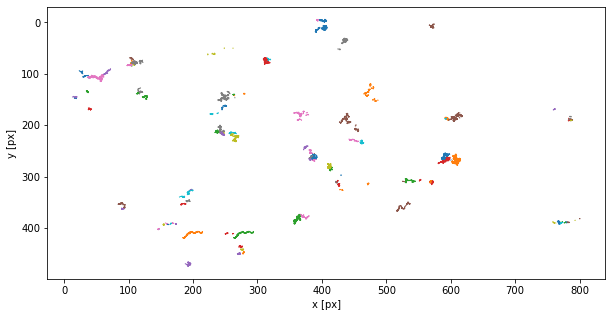

In [ ]:
ax = tp.plot_traj(tm)
plt.show()

[Text(0, 0.5, '$\\langle \\Delta r^2 \\rangle$ [$\\mu$m$^2$]'),
 Text(0.5, 0, 'lag time $t$')]

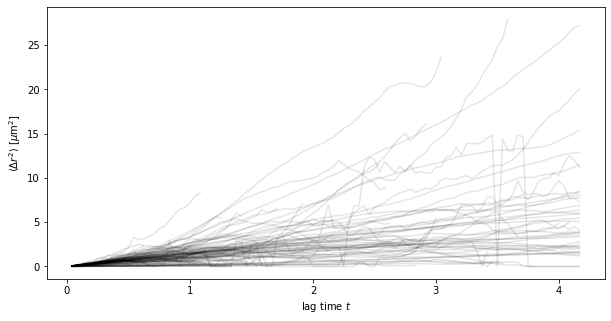

In [ ]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')

In [ ]:
em = tp.emsd(tm, 100/285., 24) # microns per pixel = 100/285., frames per second = 24

C:\Users\veillette\anaconda3\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\veillette\anaconda3\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


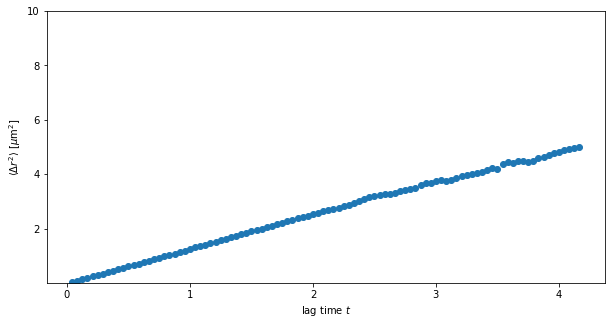

In [ ]:
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set(ylim=(1e-2, 10));

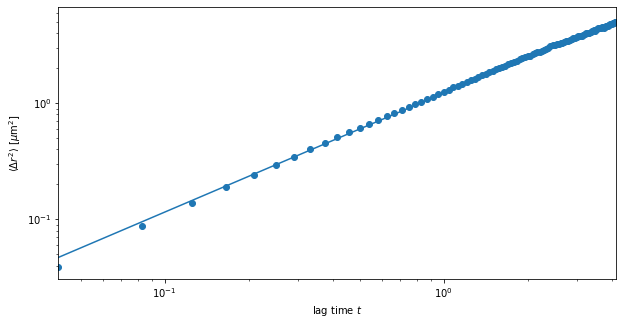

,n,A
msd,1.022952,1.218128


In [ ]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(em)  # performs linear best fit in log space, plots]